## Scalar Dynamics: Graphical Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax

In [4]:
def plot45(g, xmin, xmax, x0, num_arrows, var='x', show_num=3):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots((6.5, 6))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw, 
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]
    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args) 
            if i < show_num:
                ax.plot((x, x), (0, x), 'k', ls='dotted')
        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        if i < show_num:
            xticks.append(x)
            xtick_labels.append(r'${}_{}$'.format(var, str(i)))
        x = g(x)
    if i < show_num:
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k-', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args)
    plt.show()

In [5]:
def ts_plot(g, xmin, xmax, x0, ts_length, var='x'):
    fig, ax = subplots((7, 5.5))
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'${}_t$'.format(var), fontsize=14)
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.plot(range(ts_length), 
            x, 
            'bo-', 
            alpha=0.6, 
            lw=2, 
            label=r'${}_t$'.format(var))
    ax.legend(loc='best')
    ax.set_xticks(range(ts_length))
    ax.grid()
    plt.show()

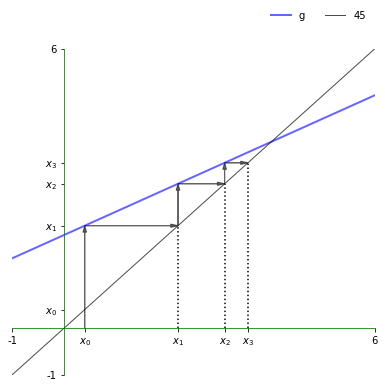

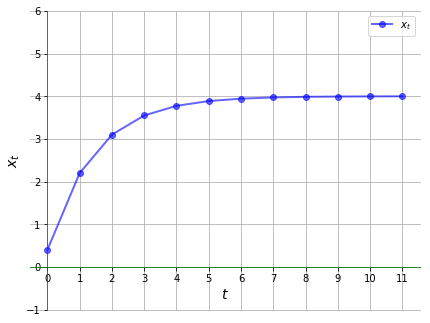

In [6]:

x0 = 0.4
num_arrows = 3
ts_length=12
xmin, xmax = -1, 6
g = lambda x: 2 + 0.5 * x
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

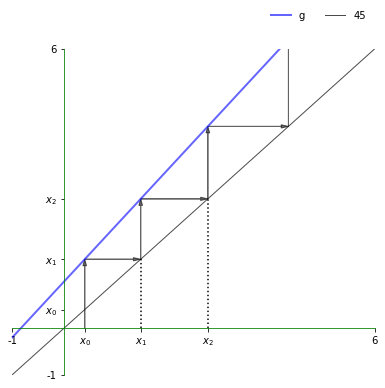

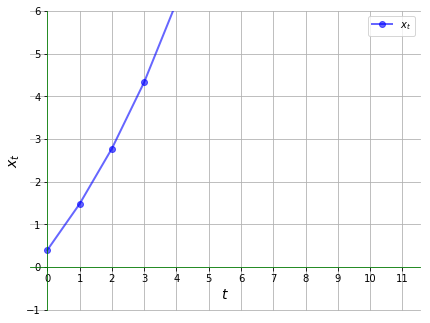

In [7]:
x0 = 0.4
num_arrows = 4
ts_length=12
xmin, xmax = -1, 6
g = lambda x: 1 + 1.2 * x
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

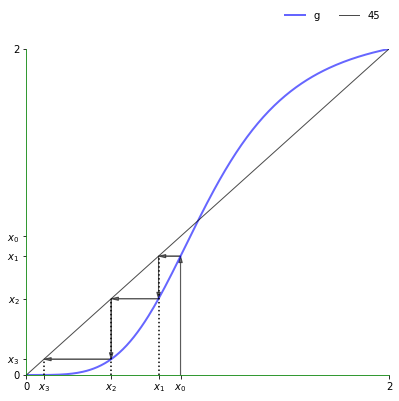

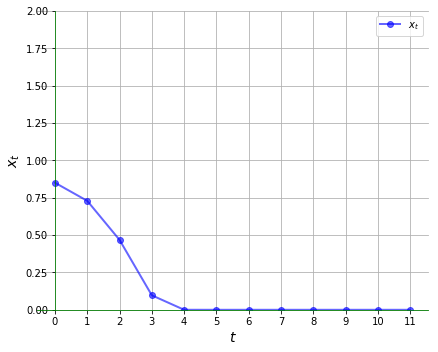

In [8]:

x0 = 0.85
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4)) 
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

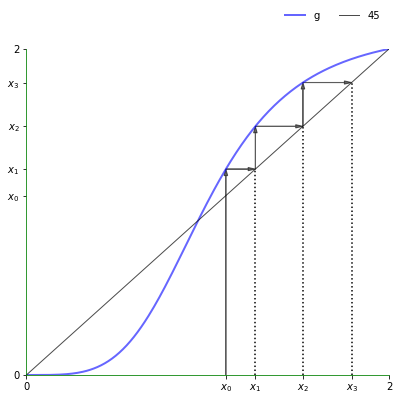

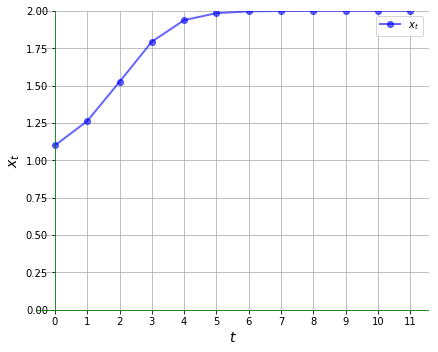

In [9]:

x0 = 1.1
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4))
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

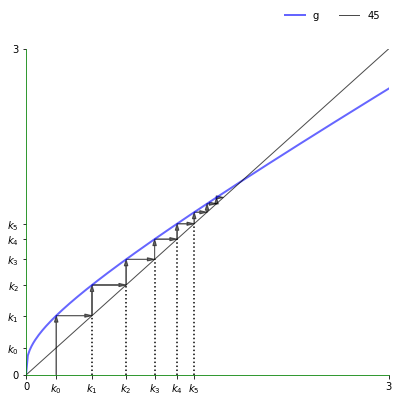

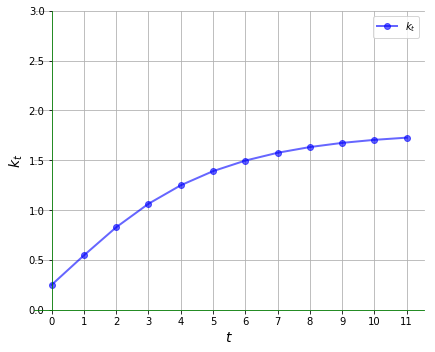

In [10]:

A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
num_arrows = 8
ts_length = 12
xmin, xmax = 0, 3
g = lambda k: A * s * k**alpha + (1 - delta) * k
plot45(g, xmin, xmax, x0, num_arrows, var='k', show_num=6)
ts_plot(g, xmin, xmax, x0, ts_length, var='k')

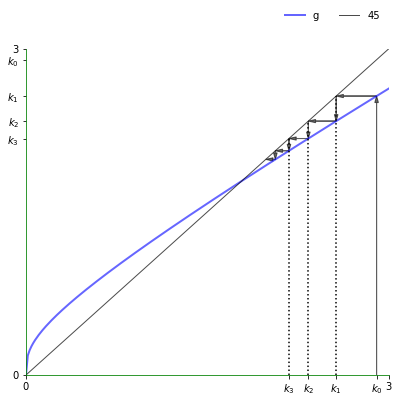

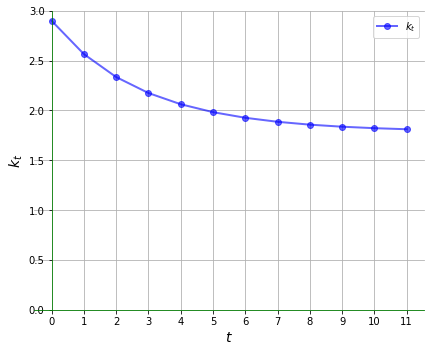

In [11]:

A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 2.9
num_arrows = 5
ts_length = 12
xmin, xmax = 0, 3
g = lambda k: A * s * k**alpha + (1 - delta) * k
plot45(g, xmin, xmax, x0, num_arrows, var='k', show_num=4)
ts_plot(g, xmin, xmax, x0, ts_length, var='k')

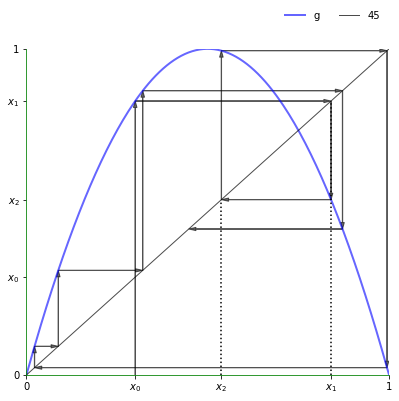

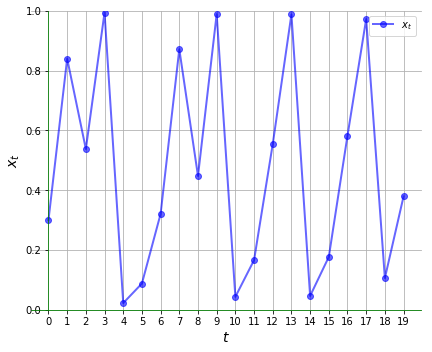

In [12]:

x0 = 0.3
num_arrows = 8
xmin, xmax = 0, 1
ts_length = 20
g = lambda x: 4 * x * (1 - x)
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

In [ ]:

num_arrows = 3
xmin, xmax = 0, 1
ts_length = 100
r = 3.2
xstar1 = 0.8 
xstar2 = 0.5
x0 = 0.4
g = lambda x: r * x * (1 - x)
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)